Jupyter Notebook: Spotify Track Prediction Model by Joseph Kim (6-26-2024) - 
Data taken from Kaggle

In [1]:
# begin by importing all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import os 

# preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from umap import umap_ as UMAP

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


import the data in via os
view the data imported in and put into pandas dataframes
preprocessing (sklearn packages)
    encoding to change explicit (false, true) into numerical values (0, 1)
    scaling to scale the data to standardized values (difference in distribution between variables for separation of colors)
use a correlation matrix and outlier plots
supervised learning - linear regression model for determining popularity

unsupervised learning - dimensionality reduction for PCA, tSNE, UMAP
clustering by 150 genres


In [2]:
df = pd.read_csv('dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Here we begin with the preprocessing: first encoding to make 'object' values into numerics, then scaling. I am using UMAP to visualize clustering.

In [3]:
# encoding to change every value to numeric. The only non-numerics are explicit and genre
encoder = OrdinalEncoder()

unencoded_columns = df.loc[:, ['explicit', 'track_genre']]
encoded_columns = encoder.fit_transform(unencoded_columns)
df.loc[:, ['explicit', 'track_genre']] = encoded_columns

df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0.0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0.0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0.0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0.0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0.0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0.0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0.0,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113.0
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0.0,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113.0
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0.0,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113.0
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0.0,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113.0


In [4]:
# should be noted that we do not really need track_id, track names or artist names.
# it may be a factor to include album names, however, due to constraints with scaling that will not need to apply here for our prediction analysis.

numeric_df = df.loc[:, ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']]
numeric_df['is_popular'] = 0
numeric_df.loc[numeric_df['popularity'] > 50, 'is_popular'] = 1

corr = numeric_df.corr()
corr

# 0.477 correlation between danceability and valence (measure of positivity)
# 0.762 correlation between energy and loudness, -0.733 correlation between energy and acousticness, -0.590 correlation between loudness and acousticness
# -0.324 correlation between instrumentalness and valence, -0.433 correlation between loudness and instrumentalness

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,is_popular
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073,0.032692,0.734738
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225,-0.032826,-0.040963
explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386,-0.054828,0.057929
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,0.003569,0.052042
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,-0.056175,-0.022272
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,-0.005508,-0.001434
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992,-0.027233,0.034287
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092,0.005242,-0.026222
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011,-0.085145,-0.049382
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138,0.077217,-0.035406


In [5]:
embedding_sampled = numeric_df.sample(n = 10000)
embedding_unscaled = UMAP.UMAP().fit_transform(embedding_sampled)
# took 35 minutes to run, when running jupyter notebook be wary of this portion.
# randomly sampling 10000 out of 114,000 tracks

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
embedding_scaled = UMAP.UMAP().fit_transform(scaled_data)

Text(0.5, 1.0, 'Scaling')

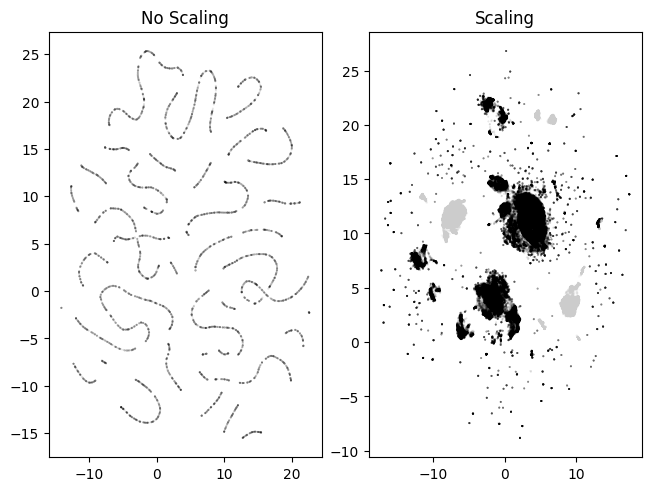

In [7]:
fix, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].scatter(embedding_unscaled[:, 0], embedding_unscaled[:, 1], s=0.2 ,c=embedding_sampled['is_popular'], alpha = 0.1, cmap='nipy_spectral')
axs[0].set_title('No Scaling')
axs[1].scatter(embedding_scaled[:, 0], embedding_scaled[:, 1], s=0.2, c=numeric_df['is_popular'], alpha = 0.1, cmap='nipy_spectral')
axs[1].set_title('Scaling')

In [8]:
numeric_df['track_genre'] = numeric_df['track_genre'].astype(str)

target_df = numeric_df.loc[:, ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']]

classifier_data = scaler.fit_transform(target_df)

Data Processing: Using a classification model to predict whether a song will be popular or not. Using several classifiers. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [KNeighborsClassifier(),
               DecisionTreeClassifier(),
               MLPClassifier(),
               RandomForestClassifier()
            ]

classifiers_names = ['KNeighborsClassifier',
                     'DecisionTreeClassifier',
                     'MLPClassifier',
                     'RandomForestClassifier'
            ]

arrays = [[], [], [], []]
    

In [10]:
for n in range(10):
    X_train, X_test, y_train, y_test = train_test_split(classifier_data, numeric_df['is_popular'], train_size=.75)
    for i in range(len(classifiers)):
        classifier = classifiers[i]
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        arrays[i].append(sum(y_pred == y_test) / len(y_test))

for i in range(len(classifiers)):
    arrays[i] = sum(arrays[i]) / 10

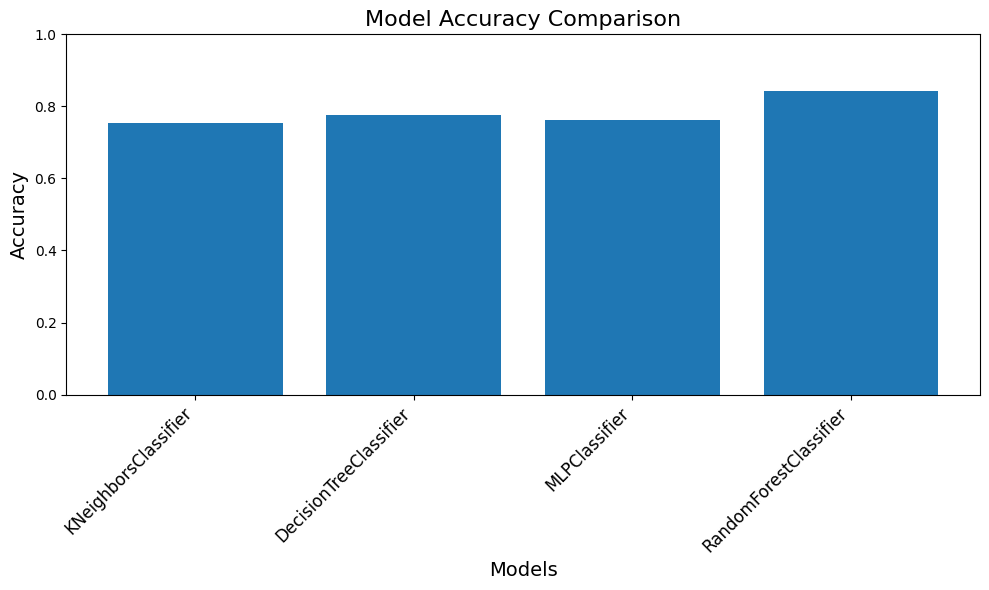

[0.7527649122807017, 0.7752210526315789, 0.7622912280701756, 0.8427649122807018]


In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(classifiers_names, arrays)
# shows that the least accurate for classification is the RandomForestClassifier. 

ax.set_title('Model Accuracy Comparison', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

print(arrays)
# [0.20258245614035092, 0.21437192982456138, 0.3167614035087719, 0.10853333333333333]

In [12]:
regressor_df = numeric_df.loc[:, ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']]

regressor_data = scaler.fit_transform(regressor_df)

In [13]:
# using regression algorithms to predict popularity
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error

regressors_names = ['Linear',
                    'Nearest Neighbors',
                    'Bayesian Ridge']

regressors = [LinearRegression(), 
              KNeighborsRegressor(), 
              BayesianRidge()]

regressors_array = {
    'MAE': {name: [] for name in regressors_names},
    'RMSE': {name: [] for name in regressors_names},
    'Scores' : {name: [] for name in regressors_names}
}

In [14]:
for n in range(10):
    X_train, X_test, y_train, y_test = train_test_split(regressor_data, numeric_df['popularity'], train_size=0.75)
    for i in range(len(regressors)):
        model = regressors[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        score = model.score(X_test, y_test)
        
        regressors_array['MAE'][regressors_names[i]].append(mae)
        regressors_array['RMSE'][regressors_names[i]].append(rmse)
        regressors_array['Scores'][regressors_names[i]].append(score)

    if n % 2 == 0:
        print(f'Completed {n}/10 simulations')
    
print('\nAfter 10 simulations, the average error for each regressor is as follows: ')

for error_type in regressors_array:
    print(f'\n{error_type}:')
    for name in regressors_names:
        avg_error = np.mean(regressors_array[error_type][name])
        print(f'{name}: {avg_error}')

Completed 0/10 simulations
Completed 2/10 simulations
Completed 4/10 simulations
Completed 6/10 simulations
Completed 8/10 simulations

After 10 simulations, the average error for each regressor is as follows: 

MAE:
Linear: 18.339932931847645
Nearest Neighbors: 15.15412210526316
Bayesian Ridge: 18.342047194188407

RMSE:
Linear: 21.99695852633519
Nearest Neighbors: 20.16649846755613
Bayesian Ridge: 21.996906213386115

Scores:
Linear: 0.02474342487671982
Nearest Neighbors: 0.1802887886327699
Bayesian Ridge: 0.024748074538923016


Not great scores based on prediction by numbers (regression). Future direction: optimizing by making categorical.